<a href="https://colab.research.google.com/github/WilliamSawran/ABC/blob/master/hw1_william_sawran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!DOCTYPE html>
<html>
<body>

**<h1>Data Preprocessing and Analyze by pivoting features of Titanic dataset</h1>**
<p>The Titanic was a luxury British steamship that sank in the early hours of April 15, 1912 after striking an iceberg, leading to the deaths of more than 1,500 passengers and crew.

**<h2>Data Dictionary</h2>**

**<h3>Variable Definition Key</h3>**

**Survival**
* 0 = No
* 1 = Yes

**Pclass** (proxy for socio-economic status) 
* 1 = 1st
* 2 = 2nd
* 3 = 3rd

**Sex**

**Age** (in years) (Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5)

**Sibsp** (# of siblings / spouses aboard the Titanic)
>Sibling = brother, sister, stepbrother, stepsister

>Spouse = husband, wife (mistresses and fiancés were ignored)

**Parch** (# of parents / children aboard the Titanic)
  >Parent = mother, father
  
  >Child = daughter, son, stepdaughter, stepson
  
  >Some children travelled only with a nanny, therefore parch=0 for them.

**Ticket** (ticket number)

**Fare** (passenger fare (British pound))

**Cabin** (cabin number) 

**Embarked** (port of embarkation)
* C = Cherbourg
* Q = Queenstown
* S = Southampton
</p>

</body>
</html>

In [67]:
#@title Import libraries

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#@title Mount Google Drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
#@title Read train and test data sets
# read train datasets
train_df = pd.read_csv('drive/My Drive/Titanic/train.csv')
test_df = pd.read_csv('drive/My Drive/Titanic/test.csv')
combine = [train_df, test_df]

#check the train dataset
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<!DOCTYPE html>
<html>
<body>

**<h2>Q1: In training set, which features are available?</h2>**

</body>
</html>

In [68]:
#@title Get available features

print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


<!DOCTYPE html>
<html>
<body>

**<h2>Q2: In training set, which features are categorical?</h2>**

<p>The categorical features are Survived, Sex, and Embarked.
</p>

</body>
</html>

<!DOCTYPE html>
<html>
<body>

**<h2>Q3: In training set, which features are numerical (e.g., discrete, continuous, or time series based)?</h2>**

<p>The numerical features are Age, Fare, SibSp, Parch.  Age and Fare are continuous numerical features.  SibSp and Parch are discrete numerical features. 
</p>

</body>
</html>

<!DOCTYPE html>
<html>
<body>

**<h2>Q4: In training set, which features are mixed data types?</h2>**

<p>The features that are mixed data types are Ticket and Cabin. 
</p>

</body>
</html>

<!DOCTYPE html>
<html>
<body>

**<h2>Q5: In training set, which features contain blank, null or empty values? In test set, which features contain blank, null or empty values?</h2>**

<p>Age and Cabin are the features in the training set that contain null values. 
</p>

<p>Age and Cabin are the features in the test set that contain blank or empty values.
</p>

</body>
</html>

In [64]:
#@title Determine features with blank, null or empty values

#-----------------------------------------------------------------------------------
# Check if the columns contain Nan using .isnull()
print("\n\n\n")
print("Check if the columns contain Nan")
print("\n   Training Set\n")
print(train_df.isnull().sum())
print("\n   Test Set\n")
print(test_df.isnull().sum())
# Check if the columns contain empty strings using .eq('')
print("\n\n\n")
print("Check if the columns contain empty strings")
print("\n   Training Set\n")
print(train_df.eq('').sum())
print("\n   Test Set\n")
print(test_df.eq('').sum())
# Check if the columns is not null
print("\n\n\n")
print("Check if the columns contain non-null cells")
print("\n   Training Set\n")
print(train_df.isnull().sum())
print("\n   Test Set\n")
print(test_df.isnull().sum())







Check if the columns contain Nan

   Training Set

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

   Test Set

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64




Check if the columns contain empty strings

   Training Set

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

   Test Set

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Em

<!DOCTYPE html>
<html>
<body>

**<h2>Q6: In training set, what are the data types (e.g., integer, floats or strings ) for various features?</h2>**

<p>The data types in the training set are as follows:

>PassengerID, Survived, Pclass, SibSp, and Parch are integers.

>Age and Fare are floats.

>Name, Sex, Ticket, Cabin and Embarked are strings.
</p>

</body>
</html>

In [28]:
#@title Get data types

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<!DOCTYPE html>
<html>
<body>

**<h3>Q7: In training set, to understand the distribution of numerical feature values across the samples, please list the properties, including count, mean, std, min, 25% percentile, 50% percentile, 75% percentile, max, of numerical features?</h3>**

</body>
</html>

In [69]:
#@title Understand distribution of numerical features

train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<!DOCTYPE html>
<html>
<body>

**<h3>Q8: In training set, to understand the distribution of categorical features, we define:  count is the total number of categorical values per column; unique is the total number of unique categorical values per column; top is the most frequent categorical value; freq is the total number of the most frequent categorical value. Please list the properties, including count, unique, top, freq,of categorical features?</h3>**

</body>
</html>

In [71]:
#@title Understand distribution of categorical features

train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",male,347082,B96 B98,S
freq,1,577,7,4,644


<!DOCTYPE html>
<html>
<body>

**<h3>Q9: In training set, can you observe significant correlation (average survived ratio>0.5) among the group of Pclass=1 and Survived? If Pclass has significant correlation with Survived, we should include this feature in the predictive model. Based on your computation, will you include this feature in the predictive model?</h3>**
<p>There is significant correlation (average survived ratio=0.629630>0.5) among Pclass=1 and Survived. Therefore, we should include this feature in the predictive model.
</p>

</body>
</html>

In [8]:
#@title Find correlation among the group of Pclass=1 and Survived

train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<!DOCTYPE html>
<html>
<body>

**<h3>Q10: In training set, are Women (Sex=female) more likely to have survived?</h3>**
<p>In the training set, women are more likely to have survived compared to men.
</p>

</body>
</html>

In [9]:
#@title Find correlation among Sex=female and Survived

train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


<!DOCTYPE html>
<html>
<body>

**<h3>Q11: In training set, let us start by understanding correlations between a numeric feature (Age) and our predictive goal (Survived). A histogram chart is useful for analyzing continuous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (e.g., infants, old). Please plot the histograms between ages and Survived (Figure 1 is an example), and answer the following questions:</h3>**

>**Do infants (Age <=4) have high survival rate?**

>**Do oldest passengers (Age = 80) survive?**

>**Do large number of 15-25 year olds not survive?**

**<h3>Based on your analysis of the figures, </h3>**

>**Should we consider Age in our model training? (If yes, then we should complete the Age feature for null values.)**

>**Should we should band age groups?**

</body>
</html>

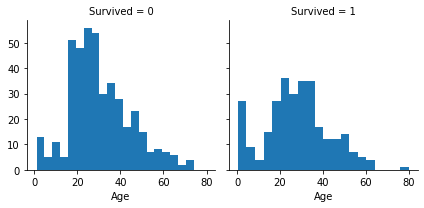

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)



<!DOCTYPE html>
<html>
<body>


* Infants (Age <=4) had a high survival rate.
* Oldest passengers (Age = 80) survived.
* A large number of 15-25 year olds did not survive.

> Based on the analysis of the figures,

* we should consider Age in our model training.
* we should also band age groups.

</body>
</html>

<!DOCTYPE html>
<html>
<body>

**<h3>Q12: We can combine three features (age, Pclass, and survivied) for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values. Please plot the plot using python, and answer the following questions:</h3>**

* **Does Pclass=3 have most passengers, however most did not survive?**
* **Do infant passengers in Pclass=2 and Pclass=3 mostly survive?**
* **Do most passengers in Pclass=1 survive?**
* **Does Pclass vary in terms of Age distribution of passengers?**
* **Should we consider Pclass for model training?**

</body>
</html>

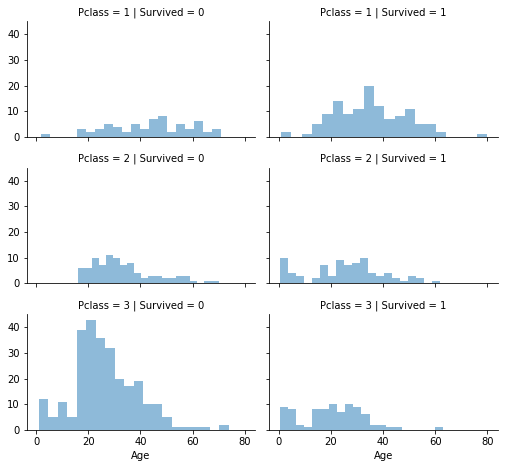

In [19]:
#@title Combine features (Age, Pclass and Survived) for identifying correlations 
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

<!DOCTYPE html>
<html>
<body>

* Pclass=3 had most passengers. Most did not survive.
* Infant passengers in Pclass=2 and Pclass=3 mostly survived.
* Most passengers in Pclass=1 survived.
* Pclass varies in terms of Age distribution of passengers.

> Based on the analysis of the figures,

* we should consider Pclass for model training.

</body>
</html>

<!DOCTYPE html>
<html>
<body>

**<h3>Q13: We want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric). Please plot a figure to illustrate the
correlations of Embarked, Sex, Fare, and Survived. Then, answer the following questions:</h3>**

* **Do higher fare paying passengers have better survival?**
* **Should we consider banding fare feature?**

</body>
</html>

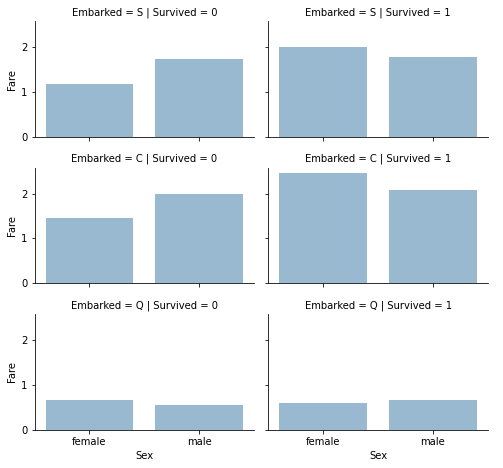

In [27]:
#@title Correlate categorical features
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, order=None, ci=None)
grid.add_legend()

<!DOCTYPE html>
<html>
<body>

* Higher fare paying passengers have better survival.

> Based on the analysis of the figures,

* we should consider banding Fare feature.

</body>
</html>

<!DOCTYPE html>
<html>
<body>

**<h3>Q14: What is the rate of duplicates for the Ticket feature? Is there a correlation between Ticket and survival? Should we drop the Ticket feature?</h3>**
<p>~23.6% of the instances in the Ticket feature are duplicates. Without further domain knowledge and because the ratio of duplicates is relatively high, there doesn't appear to be any discernable information in the ticket information and hence, there is likely no correlation between Ticket and Survival. We should drop the Ticket feature.
</p>

</body>
</html>

In [13]:
#@title Find duplicates and correlation between Ticket and Survived

duplicates = train_df.pivot_table(index = ['Ticket'], aggfunc ='size')
print(duplicates[duplicates > 1])

rate_of_duplicates_in_Ticket_feature = ( train_df['Ticket'].size - train_df['Ticket'].nunique() ) / train_df['Ticket'].size
print("\nRate of duplicates for the Ticket feature = {}".format(rate_of_duplicates_in_Ticket_feature))

#train_df.corr()

Ticket
110152              3
110413              3
110465              2
111361              2
113505              2
                   ..
SC/Paris 2123       3
STON/O2. 3101279    2
W./C. 6607          2
W./C. 6608          4
WE/P 5735           2
Length: 134, dtype: int64

Rate of duplicates for the Ticket feature = 0.2356902356902357


<!DOCTYPE html>
<html>
<body>

**<h3>Q15: Is the Cabin feature complete? How many null values there are in the Cabin features of the combined dataset of training and test dataset? Should we drop the Cabin feature?**
<p>The Cabin feature in not complete. There 1,014 null values in the Cabin feature of the combined dataset of training and test dataset.  Cabin feature should be dropped because it is incomplete or contains many null values both in training and test dataset.
</p>

</body>
</html>

<!DOCTYPE html>
<html>
<body>

**<h3>Q16: We can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal. In this question ,please convert Sex feature to a new feature called Gender where female=1 and male=0.</h3>**

</body>
</html>

In [14]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


<!DOCTYPE html>
<html>
<body>

**<h3>Q17: We start estimating and completing features with missing or null values. We will first do this for the Age feature. We can consider three methods to complete a numerical continuous feature. A simple way is to generate random numbers between mean and standard deviation. More accurate
way of guessing missing values is to use the K-Nearest Neighbor algorithm to select the top-K most similar data points, and then use the top-K most similar data points to impute the missing values of ages.</h3>**

</body>
</html>

In [ ]:
#@title Estimating and completing features with missing or null values
# Use Pandas’ data frame attributes, ‘.isna()’ and ‘.isany()’, to detect missing values
print('Before filling missing values, Age has {} missing values\n'.format(train_df['Age'].isna().sum()))

# Guess missing values using K-Nearest Neighbor algorithm from sklearn library
print('Fill missing values using K-Nearest Neighbor algorithm')
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

passengerId_df = train_df['PassengerId']
age_df = train_df['Age']
frame = { 'PassengerId': passengerId_df, 'Age': age_df }
passengerId_and_age_df = pd.DataFrame(frame)
passengerId_and_age_df['Age']

scaler = MinMaxScaler()
passengerId_and_age_df = pd.DataFrame(scaler.fit_transform(passengerId_and_age_df), columns = passengerId_and_age_df.columns)
imputer = KNNImputer(n_neighbors=5)
passengerId_and_age_df = pd.DataFrame(imputer.fit_transform(passengerId_and_age_df),columns = passengerId_and_age_df.columns)
print(passengerId_and_age_df)
train_df['Age'] = passengerId_and_age_df['Age'].values
train_df['Age'].head

print('\nAfter filling missing values, Age has {} missing values\n'.format(train_df['Age'].isna().sum()))

<!DOCTYPE html>
<html>
<body>

**<h3>Q18: Complete a categorical feature: Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has some missing values. Please simply fill these with the most common occurrences.</h3>**

</body>
</html>

In [60]:
#@title Complete Embarked categorical feature

freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


<!DOCTYPE html>
<html>
<body>

**<h3>Q19: Complete and convert a numeric feature. Please complete the Fare feature for single missing value in test dataset using mode to get the value that occurs most frequently for this feature.</h3>**

</body>
</html>

In [17]:
#@title Complete and convert Fare numeric feature

print(train_df['Fare'].isin([np.inf, -np.inf]).sum())

train_array = train_df['Fare'].values
print(np.isfinite(train_array).all())

test_df['Fare'].fillna(test_df['Fare'].dropna().mode(), inplace=True)
test_df.head()

0
True


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<!DOCTYPE html>
<html>
<body>

**<h3>Q20: Convert the Fare feature to ordinal values based on the FareBand defined follows:</h3>**

</body>
</html>

In [55]:
#@title Convert Fare feature to ordinal values

train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31.0), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 31.0, 'Fare'] = 3

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.0,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,3.0,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,1.0,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.0,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,1.0,NaN,S


<!DOCTYPE html>
<html>
<body>

**<h4>Additional Questions:</h4>**

**<h5>1. Approximately how many hours did you spend on this assignment?</h5>**
> Approximately 35 hours was allocated to this assignment.  This time duration includes the additional time spent reading and studying data processing and Pandas library related to this assigment.

**<h5>2. Which aspects of this assignment did you find most challenging? Were there any significant stumbling blocks?</h5>**
> The major stumbling blocks in most cases is learning the practical skills of using Pandas, Seaborn, Matplotlib and Sklearn to accomplish data processing tasks.

**<h5>3. Which aspects of this assignment did you like? Is there anything you would have changed?</h3>**
> There were many positive aspects to the assignment.  Firstly, the Titanic dataset is a well-known and interesting dataset to the data science community.  Secondly, the assignment questions, charts and tables helped organize and guide the data preprocessing tasks.  Thirdly, many instructional articles, tutorials, and blogs that I read and watched used the Titanic dataset, which made them not only informative but relevant and applicable also.

This file can be located at:
https://github.com/WilliamSawran/ABC/blob/master/hw1_william_sawran.ipynb

</body>
</html>